        ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2  
Kernel = linear
Accuracy: 0.9591
Recall: 0.9667
Precision: 0.9206
F1-score: 0.9431
Jaccard score: 0.8923
Error rate: 0.0409
Confusion matrix:
 [[106   5]
 [  2  58]]

Kernel = poly
Accuracy: 0.9474
Recall: 0.9000
Precision: 0.9474
F1-score: 0.9231
Jaccard score: 0.8571
Error rate: 0.0526
Confusion matrix:
 [[108   3]
 [  6  54]]

Kernel 

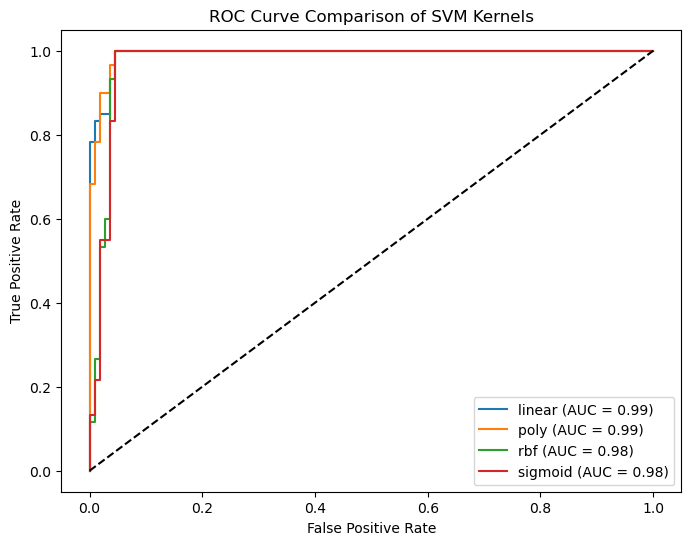

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load and split data
df = pd.read_csv('pima-indians-diabetes.data.csv', header=None)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Normalize data for SVM and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to compare
models = {
    'SVM (RBF)': SVC(probability=True, kernel='rbf', random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
}

# To store results
results = {}

# Model training and evaluation
for name, model in models.items():
    if name in ['SVM (RBF)', 'KNN']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
        
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    results[name] = {
        'acc': acc,
        'rec': rec,
        'prec': prec,
        'f1': f1,
        'cm': cm,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc
    }
    # Print metrics
    print(f"{name}: Accuracy={acc:.4f}, Recall={rec:.4f}, Precision={prec:.4f}, F1={f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Heatmaps
plt.figure(figsize=(10, 8))
for idx, (name, result) in enumerate(results.items()):
    plt.subplot(2, 2, idx+1)
    sns.heatmap(result['cm'], annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()
plt.show()

# ROC Curve Comparison
plt.figure(figsize=(8, 6))
for name, result in results.items():
    plt.plot(result['fpr'], result['tpr'], label=f"{name} (AUC={result['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()
